<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/06_Clustering/02_k_means_elbow_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UCZENIE NIENADZOROWANE /  UNSUPERVISED LEARNING

#K-means implementation - elbow method


A basic library for machine learning in Python
To install the scikit-learn library, use the command below:
```
!pip install scikit-learn
```
To update to the latest version of the scikit-learn library, use the command below:
```
!pip install --upgrade scikit-learn
```

### Contents:
1. [Import libraries](#0)
2. [Data generation](#1)
3. [K-means algorithm](#2)
4. [WCSS - Within-Cluster Sum-of-Squared](#3)
5. [Elbow method](#4)
6. [Cluster visualisation](#5)

In [1]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### <a name='0'></a> Import libraries

In [3]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
import random
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.3)
np.random.seed(42)
np.set_printoptions(precision=6)


### <a name='1'></a> Data generation

In [4]:
from sklearn.datasets import make_blobs
data=make_blobs(n_samples=1000,centers=4,cluster_std=1.5, center_box=(-8.0,8.0), random_state=42)[0]
df=pd.DataFrame(data, columns=['x1','x2'])
df.head()

,x1,x2
0,-6.645730,5.470461
1,-4.390559,-5.055149
2,-4.666211,-5.390080
3,3.022862,0.303769
4,3.322516,-0.676179


### <a name='2'></a> Data visualisation

In [5]:
fig=px.scatter(df,'x1','x2',width=900, height=500, title='K-means algorithm', template ='plotly_dark')
fig.update_traces(marker_size=5)

### <a name='3'></a> Implementation of the K-means algorithm

In [6]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(data)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [7]:
#wcss
kmeans.inertia_

3851.5468342108556

In [8]:
y_kmeans = kmeans.predict(data)
y_kmeans[:10]

array([4, 1, 1, 2, 2, 1, 2, 1, 1, 2], dtype=int32)

In [9]:
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,4
1,-4.390559,-5.055149,1
2,-4.666211,-5.390080,1
3,3.022862,0.303769,2
4,3.322516,-0.676179,2


In [10]:
fig = go.Figure()
fig=px.scatter(df,'x1','x2','y_kmeans', width=900, height=500, title='K-means algorithm - 5 clusters', template='plotly_dark')
fig.update_traces(marker_size=5)
fig.update_layout(showlegend=False)
fig.show()

### <a name='2'></a> WCSS - Within-Cluster Sum-of-Squared

In [11]:
wcss=[]
for i in range(2,10):
  kmeans=KMeans(n_clusters=i, n_init='auto')
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
print(wcss)

[23414.04045869599, 7734.886635126095, 4282.137026938607, 3850.9427554418544, 3459.6967044204616, 3049.819561944279, 2840.328730330558, 2539.5447565736754]


In [12]:
wcss=pd.DataFrame(wcss, columns=['wcss'])
wcss=wcss.reset_index()
wcss=wcss.rename(columns={'index':'clusters'})
wcss['clusters']+=1
wcss.head()

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3850.942755
4,5,3459.696704


### <a name='4'></a> Elbow method

In [13]:
px.line(wcss, x='clusters',y='wcss', width=900, height=500,title='Within-Cluster-Sum of Squared Errors (WCSS)',
        template='plotly_dark')
     

Becouse we have 3 lines. It means n_clusters =3

### <a name='5'></a> Clusters visualisation

In [14]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=950, height=500, title='K_means algorithm - 3 clusters', 
           template='plotly_dark')

In [15]:
centers=pd.DataFrame(data=kmeans.cluster_centers_, columns=['c1','c2'])
centers

,c1,c2
0,3.630348,1.808377
1,-4.678306,6.633539
2,-5.302413,-5.404200


In [16]:
fig = go.Figure()
fig=px.scatter(df,'x1','x2','y_kmeans', width=900, height=500, title='K-means algorithm - 3 clusters', template='plotly_dark')
fig.add_trace(go.Scatter(x=centers['c1'], y=centers['c2'], mode='markers'))
fig.update_traces(marker_size=5)
fig.update_layout(showlegend=False)
fig.show()

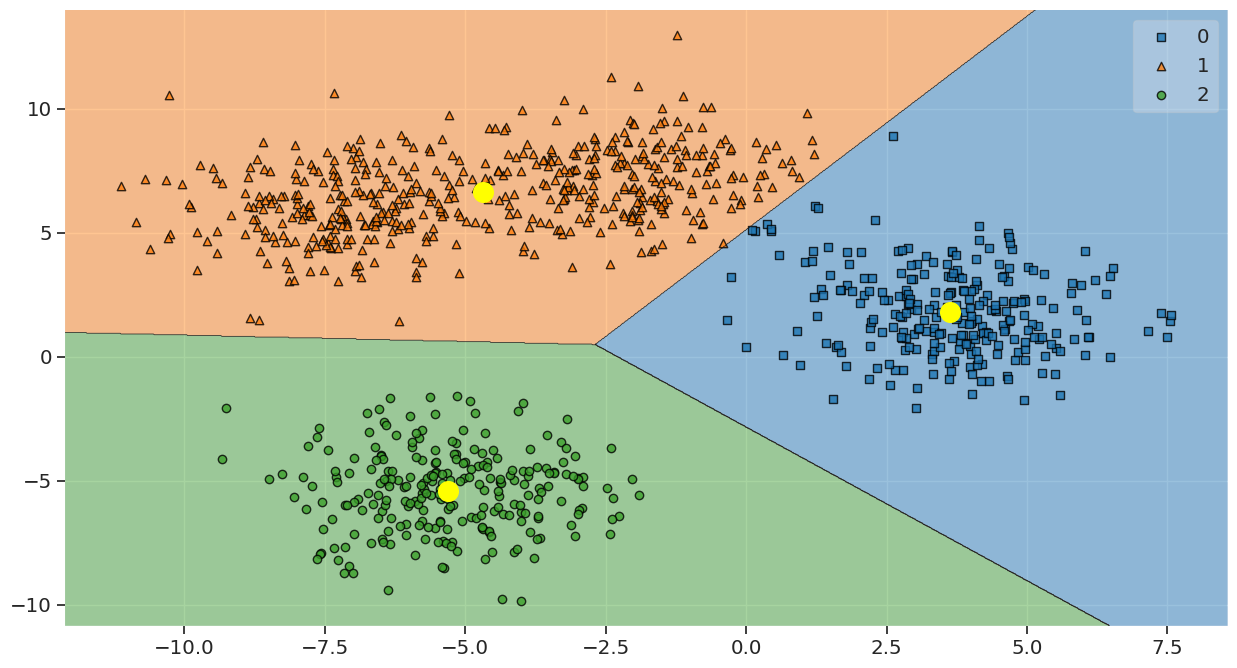

In [17]:

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(15, 8))
plt.title('Decision border')
plot_decision_regions(X=data, y=y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow')
plt.show()